In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/Users/yinguopeng/Documents/PyFile')

In [2]:
%matplotlib inline

In [3]:
#Bacause I processed the date of disbursement in the next steps, I had to delete some rows 
#beyond normal values, such as 06/12/2714. So, please delete some abnormal records if you 
#want to re-run these codes. Thanks.
us2010 = pd.read_csv('all_house_senate_2010.csv',low_memory=False)

In [4]:
us2012 = pd.read_csv('all_house_senate_2012.csv',low_memory=False)

In [5]:
us2016 = pd.read_csv('all_house_senate_2016.csv',low_memory=False)

In [6]:
us_all = pd.concat([us2010,us2012,us2016], ignore_index=True)

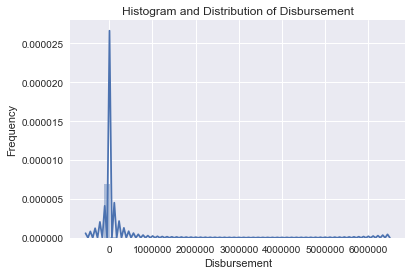

In [7]:
#The goal of the visualizations is to explore the disbursement from different perspectives. 
#Figure1 wants to describe the basic distribution of the Disbursement. 
Figure1= sns.distplot(us_all['dis_amo'])
Figure1.set(ylabel='Frequency', xlabel='Disbursement', title="Histogram and Distribution of Disbursement")

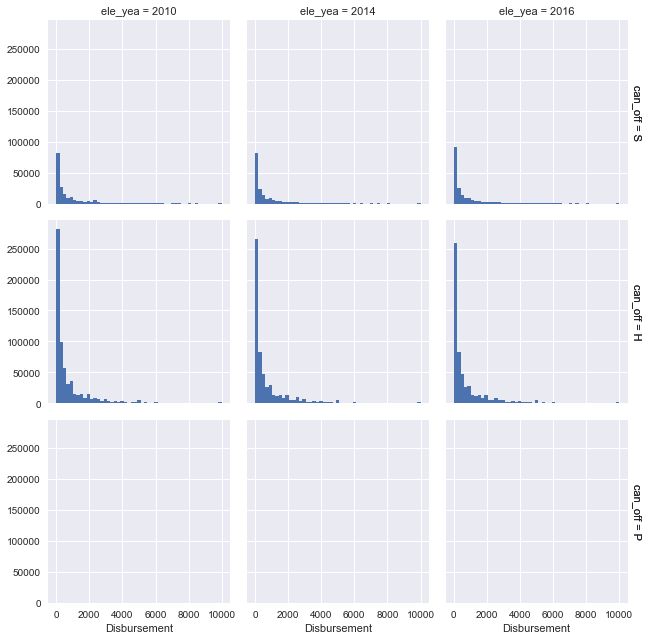

In [8]:
#Figure 2 is to give the distribution of Disbursement across the election years
#and the types of offices. 
Figure2 = sns.FacetGrid(us_all, row="can_off",col="ele_yea",margin_titles=True)
Figure2.map(plt.hist,"dis_amo",bins=np.linspace(0,10000,50))
Figure2.set_xlabels(label="Disbursement")
Figure2.set_titles('{col_value}')

In [14]:
order_by_state = us_all.groupby(["rec_sta"])['dis_amo'].aggregate(np.mean).reset_index().sort_values('dis_amo',ascending=False)

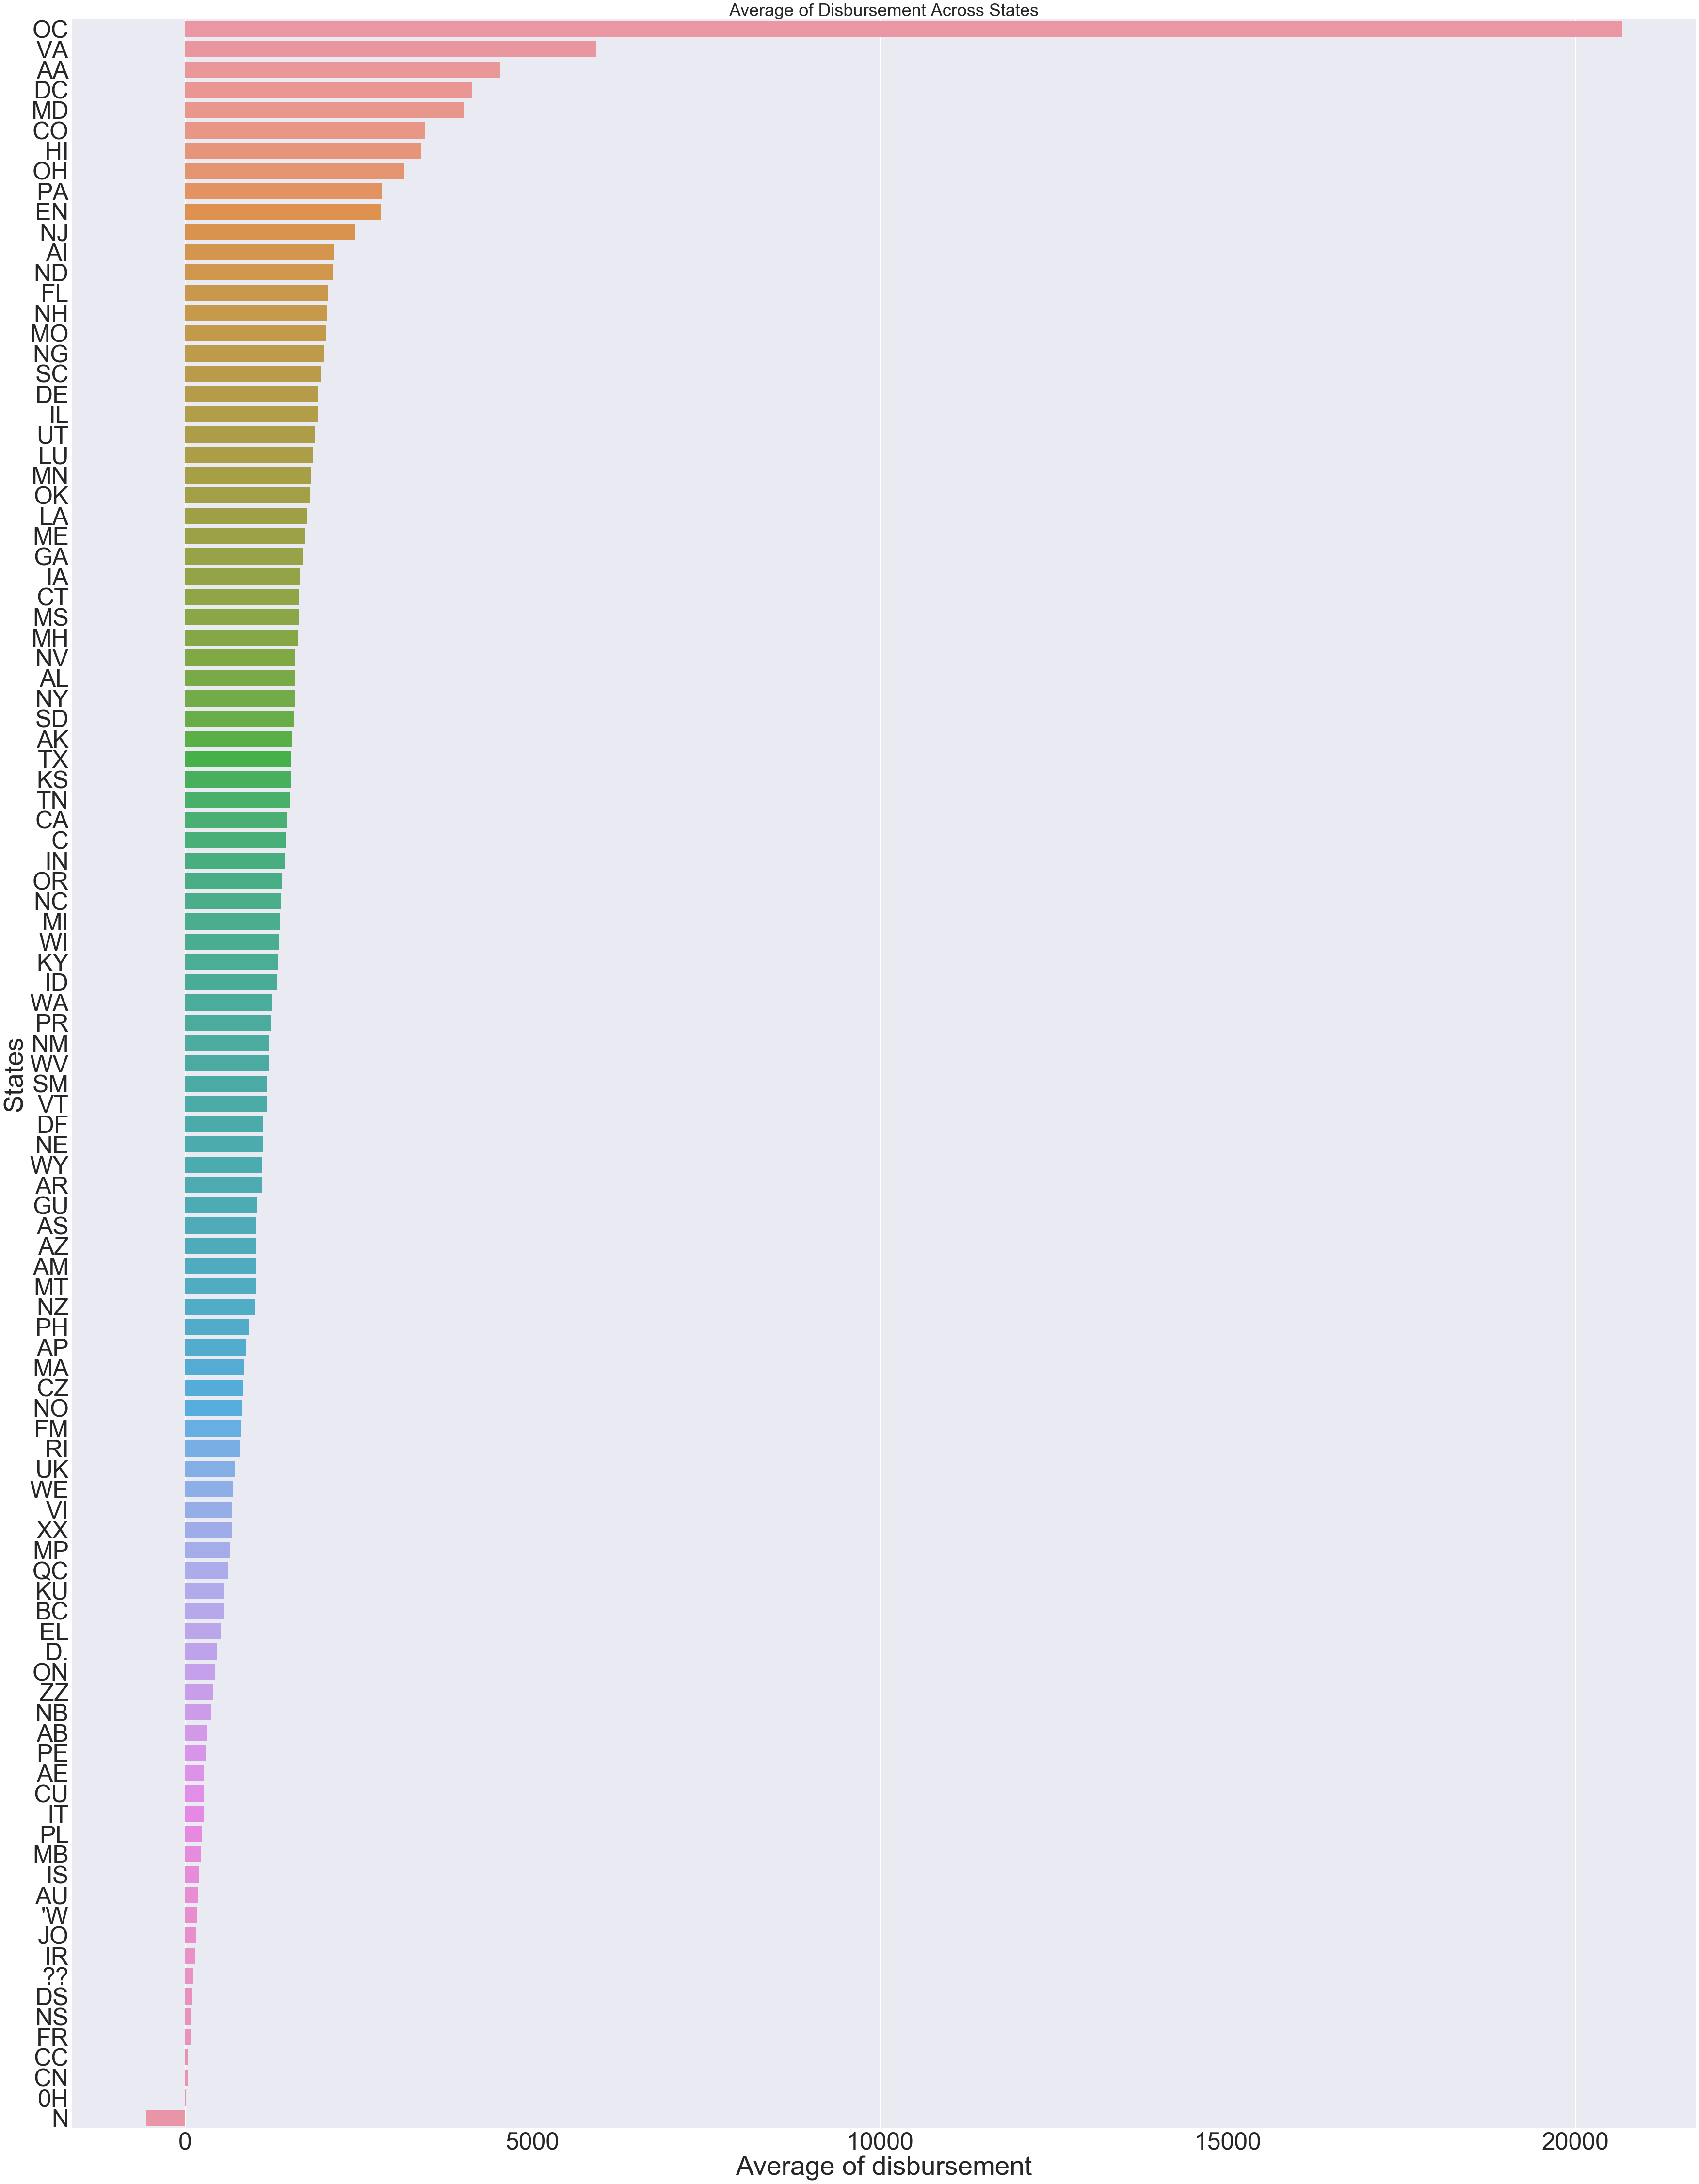

In [17]:
#Figure 3 present the rank of average disbursement based the states of candidates. 
plt.figure(figsize=(60,80))
Figure3=sns.barplot(x="dis_amo", y="rec_sta",  data=us_all, ci =0, order = order_by_state['rec_sta'])
sns.set(font_scale=3)
Figure3.set(xlabel="Average of disbursement", ylabel="States",  title="Average of Disbursement Across States")
plt.show()

In [18]:
#I got the attribute of Year and Month from the date of disbursement. And, there are some values
#that are beyond the normal range. So, I deleted some rows directly from the excel files. 
us_all['dis_year']=pd.DatetimeIndex(us_all['dis_dat']).year
us_all['dis_month']=pd.DatetimeIndex(us_all['dis_dat']).month

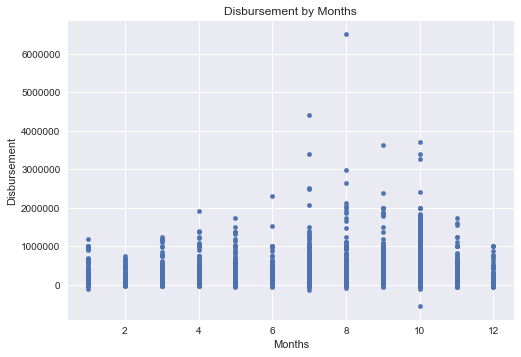

In [20]:
#Through this figure, we can know the distribution of disbursement across the months. 
sns.set(font_scale=1)
Figure4 = us_all.plot.scatter(x='dis_month',y='dis_amo',title="Disbursement by Months")
Figure4.set_xlabel("Months")
Figure4.set_ylabel("Disbursement")

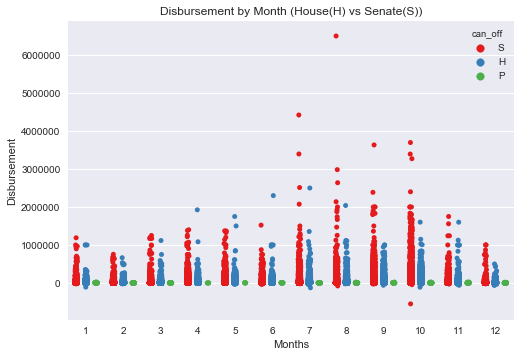

In [21]:
#Further, we add the dimension of candidate offices, and want to explore the distribution of 
#disbursement in details. 
Figure5=sns.stripplot(x="dis_month", y="dis_amo", data=us_all,jitter=True,hue='can_off',palette='Set1',split=True)
Figure5.set(xlabel="Months",ylabel="Disbursement",title="Disbursement by Month (House(H) vs Senate(S))")

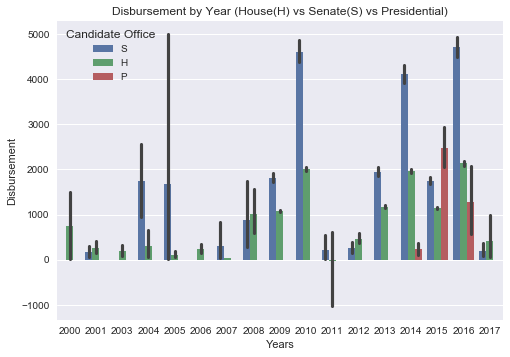

In [42]:
#In this figure,we can observe the disbursement across the different years and candidate offices.  
sns.despine(offset=10, trim=True)
Figure6 = sns.barplot(x='dis_year',y='dis_amo', hue= 'can_off', data=us_all)
Figure6.set(xlabel="Years",ylabel="Disbursement",title="Disbursement by Year (House(H) vs Senate(S) vs Presidential)")
Figure6.legend(title= 'Candidate Office',loc='upper left')

In [23]:
# We further explore the distribution of disbursement in the aggregated level of committees. 
# It may provide different views on the distribution of disbursement.
us_all_com = us_all.groupby('com_nam').agg({"dis_amo":[sum,min,max]})

In [24]:
us_all_com.columns = us_all_com.columns.droplevel(level=0)
us_all_com.rename(columns={"sum": "dis_amo_sum", "min": "dis_amo_min", "max": "dis_amo_max"})
us_all_com.head()

,sum,min,max
com_nam,,,
ADDIVINOLA COMMITTEE; THE,59746.85,5.00,2500.00
BEACH DISTRICT WIEDER TO CONGRESS WIN IN 2014 COMMITTEE; THE,500.77,123.00,377.77
RICHARD BURR COMMITTEE; THE,13381862.35,-1352.30,3392737.00
A J OTJEN FOR CONGRESS COMMITTEE TO ELECT AJOTJEN,21986.79,76.93,2400.00
A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSIONAL COMMITTEE,2658438.34,-1106.00,152612.50


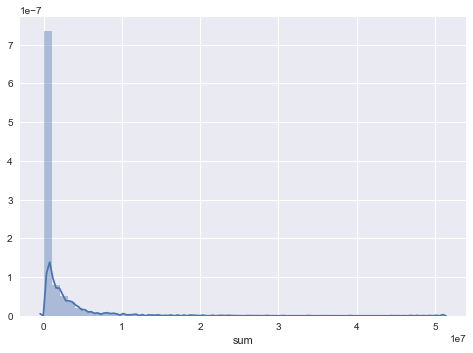

In [25]:
Figure7= sns.distplot(us_all_com['sum'])

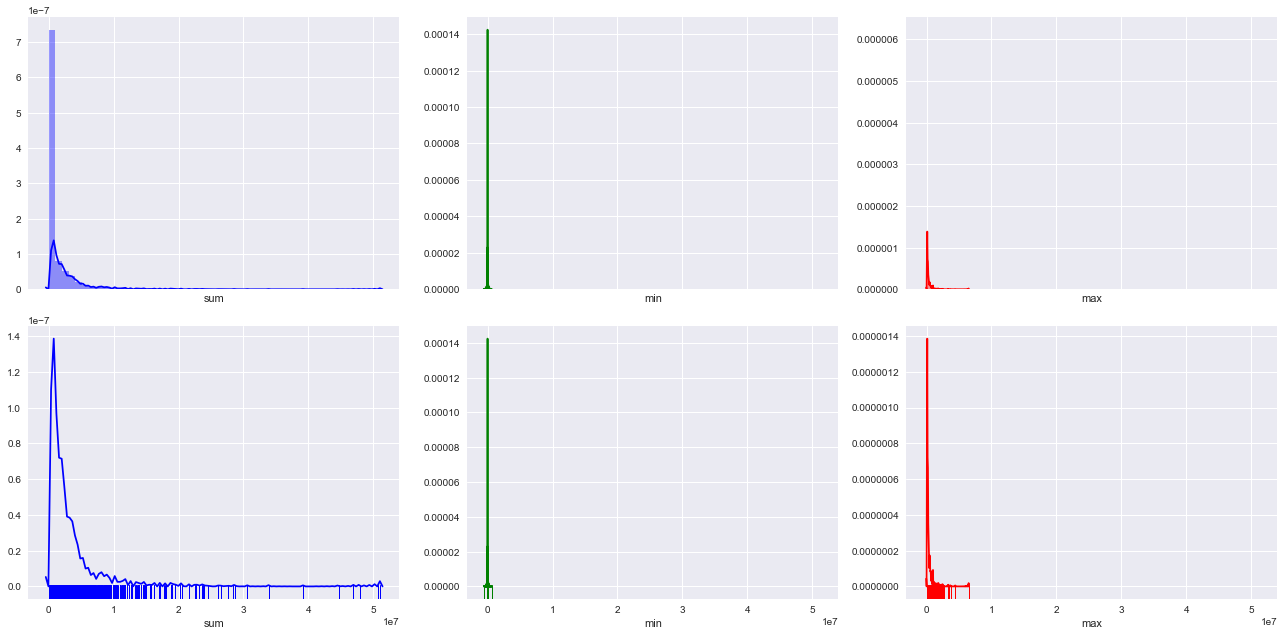

In [26]:
Figure7, ax = plt.subplots(figsize=(18, 9), ncols=3, nrows=2,sharex=True)
sns.despine(left=True)
sns.distplot(us_all_com['sum'], color="b", ax=ax[0,0])

sns.distplot(us_all_com['min'], color="g", ax=ax[0,1])

sns.distplot(us_all_com['max'], color="r", ax=ax[0,2])

sns.distplot(us_all_com['sum'], hist=False, rug=True, color="b", ax=ax[1,0])

sns.distplot(us_all_com['min'], hist=False, rug=True, color="g", ax=ax[1,1])

sns.distplot(us_all_com['max'], hist=False, rug=True, color="r", ax=ax[1,2])

plt.tight_layout()

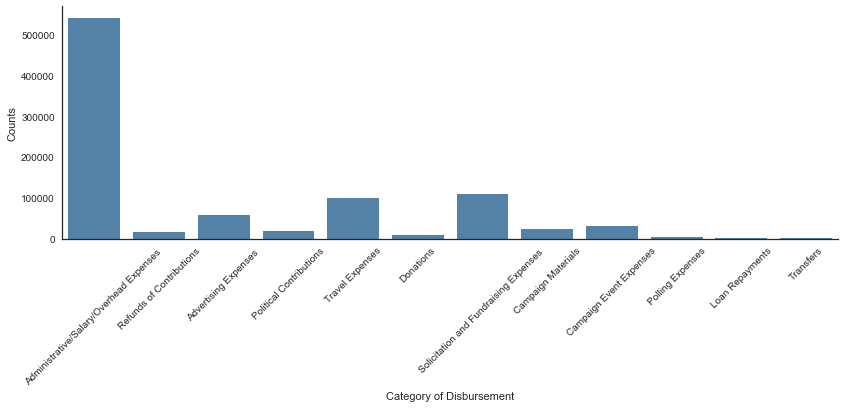

In [27]:
#Figure 8 explores the distribution of disbursement according to different categories of spending.
with sns.axes_style('white'):
      Figure8 = sns.factorplot("cat_des",data=us_all,aspect=3,kind="count",color="steelblue")
Figure8.set_xticklabels(step=1,rotation=45)
Figure8.set_titles("The Count of Disbursement for Every Category ")
Figure8.set_xlabels("Category of Disbursement")
Figure8.set_ylabels("Counts")

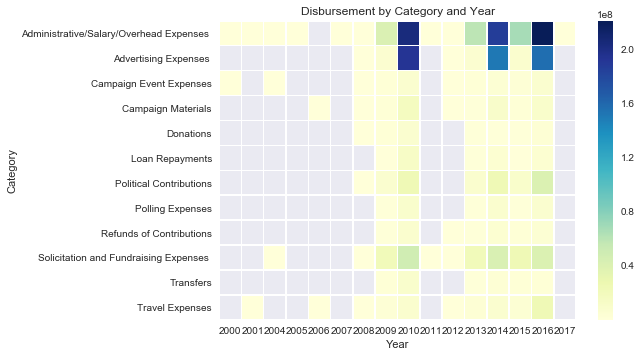

In [28]:
#Figure 9 further explores the correlation between the categories and different years 
#in term of disbursement. So, we can have a better whole view on the distribution of disbursement.
Figure9_data=us_all.pivot_table(values='dis_amo',index='cat_des',columns='dis_year',aggfunc=np.sum)
Figure9=sns.heatmap(Figure9_data,linewidths=.5,cmap="YlGnBu")
Figure9.set(xlabel="Year",ylabel="Category",title="Disbursement by Category and Year")

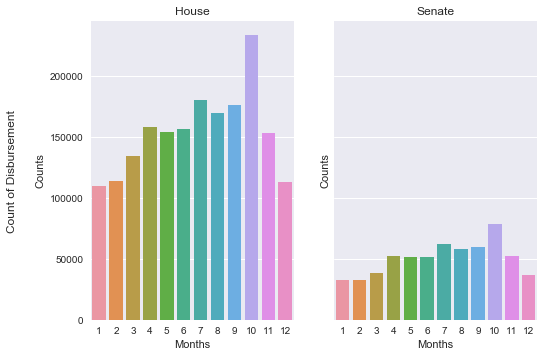

In [43]:
#The last figure compares the distribution of disbursement between the House and Senate
Figure10, ax10 =plt.subplots(1,2,sharex=True, sharey=True)
Figure10.text(0.5, 0.04, ' ', ha='center')
Figure10.text(-0.02, 0.5, 'Count of Disbursement', va='center', rotation="vertical")
sns.countplot(x='dis_month', data=us_all[us_all.can_off=='H'],ax=ax10[0])
sns.countplot(x='dis_month', data=us_all[us_all.can_off=='S'],ax=ax10[1])
ax10[0].set_xlabel('Months')
ax10[1].set_xlabel('Months')
ax10[0].set_ylabel('Counts')
ax10[1].set_ylabel('Counts')
ax10[0].set_title('House')
ax10[1].set_title('Senate')
plt.show()